## Моделирование банковского личного кредита

## Подключение модулей

In [802]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [803]:
%matplotlib inline

## Загрузка данных

In [804]:
# загружаем данные из файла в формате csv, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('Bank_Personal_Loan_Modelling_full.csv', sep = ',')

In [805]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [806]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(5000, 14)

# Описание данных:

- **ID** - Идентификатор клиента  
- **Age** - Возраст клиента в годах  
- **Experience** - Количество лет профессионального опыта  
- **Income** - Годовой доход клиента (в тысячах долларов)  
- **ZIPCode** - Почтовый индекс домашнего адреса  
- **Family** - Размер семьи клиента  
- **CCAvg** - Средние траты по кредитной карте в месяц (в тысячах долларов)  
- **Education** - Уровень образования. 1: Бакалавриат; 2: Магистратура; 3: Продвинутое/Профессиональное  
- **Mortgage** - Размер ипотеки на дом, если таковая имеется (в тысячах долларов)  
- **Personal Loan** - Принял ли клиент персональный кредит, предложенный в последней кампании?(target) 
- **Securities Account** - Имеет ли клиент счет ценных бумаг в банке?  
- **CD Account** - Имеет ли клиент депозитный сертификат (CD) в банке?  
- **Online** - Пользуется ли клиент интернет-банкингом?  
- **CreditCard** - Пользуется ли клиент кредитной картой, выпущенной UniversalBank?  

In [807]:
# выводим типы данных
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [808]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [809]:
# имена колонок в виде списка
columns = df.columns
columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [810]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [811]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<Axes: xlabel='Personal Loan'>

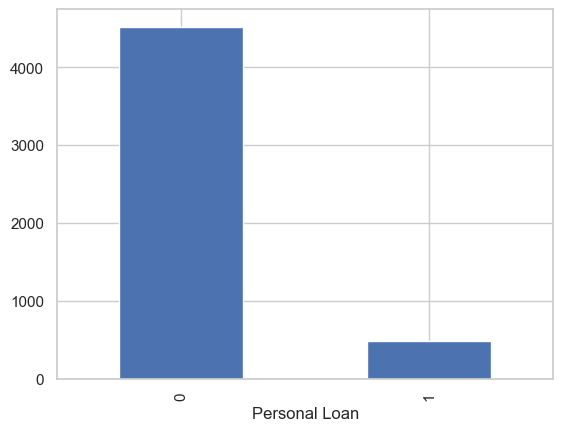

In [812]:
df['Personal Loan'].value_counts(normalize=False).plot.bar()

In [813]:
df['Age'].nunique()

45

In [814]:
columns = df.columns
columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [815]:
# матрица коррелаций
corr = df[columns].corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<Axes: >

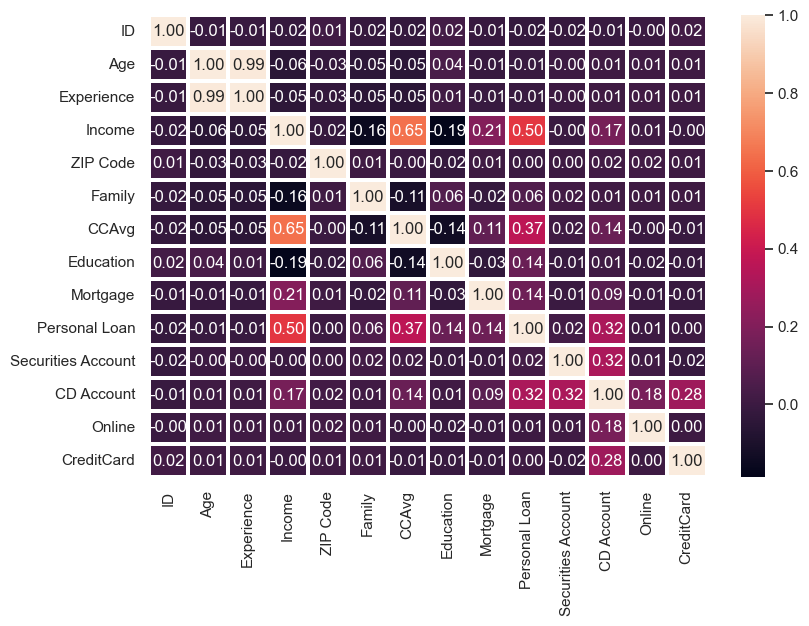

In [816]:
# тепловая карта корреляций между признаками

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

## Предварительная обработка данных (preprocessing)

In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [818]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [819]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [820]:
df.loc[df['Experience'] < 0, 'Experience'] = df['Experience'].median()

In [821]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [822]:
features_names = df.columns
features_names

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [823]:
X = df[['CCAvg', 'Education', 'Mortgage', 'CD Account']]

In [824]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Personal Loan']

In [825]:
y.value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

### Обучение


In [826]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [827]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3350, 4) (1650, 4) (3350,) (1650,)


In [828]:
y_train.value_counts()

Personal Loan
0    3028
1     322
Name: count, dtype: int64

In [829]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [830]:
from sklearn.neighbors import KNeighborsClassifier

In [831]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: user 1.92 ms, sys: 1.45 ms, total: 3.36 ms
Wall time: 2.61 ms


KNeighborsClassifier()

In [832]:
knn_pred_test = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred_test)


In [833]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

### Gaussian Naive Bayes (Байесовский классификатор)

In [834]:
from sklearn.naive_bayes import GaussianNB

In [835]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: user 1.65 ms, sys: 1.16 ms, total: 2.81 ms
Wall time: 1.99 ms


GaussianNB()

In [836]:
gnb_pred_test = gnb.predict(X_test)

In [837]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.8872727272727273

In [838]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

### Random Forest Classifier (Классификатор дерева решений)

In [839]:
from sklearn.ensemble import RandomForestClassifier

In [840]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: user 153 ms, sys: 45 ms, total: 198 ms
Wall time: 163 ms


In [841]:
rfc_pred_test = rfc.predict(X_test)

In [842]:
from sklearn.metrics import accuracy_score

In [843]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

In [844]:
rfc_accuracy

0.9484848484848485

### Logistic Regression (Логистическая регрессия)

In [845]:
from sklearn.linear_model import LogisticRegression

In [846]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

In [847]:
sc_X_train

array([[ 0.21380352,  1.32477423,  1.34368384, -0.25464534],
       [ 0.38559985,  1.32477423, -0.55414733, -0.25464534],
       [ 2.71630334, -1.05166147, -0.55414733, -0.25464534],
       ...,
       [ 0.44286529, -1.05166147, -0.55414733, -0.25464534],
       [-0.53064723,  1.32477423, -0.55414733, -0.25464534],
       [-0.58791267,  1.32477423, -0.55414733, -0.25464534]])

In [848]:
sc_X_test

array([[ 0.55739617, -1.05166147, -0.55414733, -0.25464534],
       [ 0.61466161,  1.32477423, -0.55414733,  3.92703051],
       [ 1.35911236, -1.05166147, -0.55414733, -0.25464534],
       ...,
       [-0.64517811,  0.13655638, -0.55414733, -0.25464534],
       [-0.87423988,  0.13655638,  0.4390182 , -0.25464534],
       [-0.98877076,  0.13655638, -0.55414733, -0.25464534]])

In [849]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(sc_X_train, y_train)

CPU times: user 2.24 ms, sys: 1.67 ms, total: 3.92 ms
Wall time: 3.06 ms


LogisticRegression(random_state=42)

In [850]:
lr_pred_test = lr.predict(sc_X_test)

In [851]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

0.9254545454545454

In [852]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

## Метрики классификации

In [853]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

### Confusion matrix (матрица ошибок)

In [854]:
# performance measurement
# y_train_predict = knn.predict(X_train)
# y_test_predict = knn.predict(X_test)

knn_y_test_predict = knn.predict(X_test)
gnb_y_test_predict = gnb.predict(X_test)
rfc_y_test_predict = rfc.predict(X_test)
lr_y_test_predict = lr.predict(X_test.values)

In [855]:
from sklearn.metrics import confusion_matrix

In [856]:
knn_cm = confusion_matrix(y_test, knn_y_test_predict)
gnb_cm = confusion_matrix(y_test, gnb_y_test_predict)
rfc_cm = confusion_matrix(y_test, rfc_y_test_predict)
lr_cm = confusion_matrix(y_test, lr_y_test_predict)
print(knn_cm)
print(gnb_cm)
print(rfc_cm)
print(lr_cm)

[[1474   18]
 [  95   63]]
[[1395   97]
 [  89   69]]
[[1479   13]
 [  72   86]]
[[ 466 1026]
 [   8  150]]


In [857]:
classifiers =["KNeighborsClassifier","Gaussian Naive Bayes","Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [858]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.931515
1,Gaussian Naive Bayes,0.887273
2,Random Forest Classifier,0.948485
3,Logistic Regression,0.925455


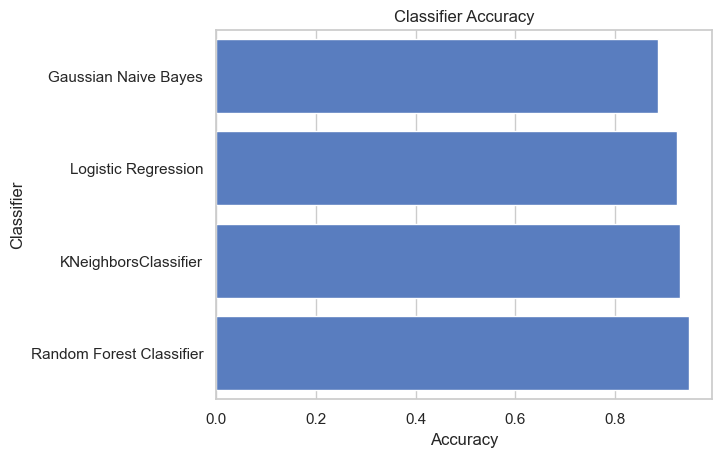

In [859]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

In [860]:
print(classification_report( y_test, knn_y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1492
           1       0.78      0.40      0.53       158

    accuracy                           0.93      1650
   macro avg       0.86      0.69      0.75      1650
weighted avg       0.92      0.93      0.92      1650



In [861]:
print(classification_report( y_test, gnb_y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1492
           1       0.42      0.44      0.43       158

    accuracy                           0.89      1650
   macro avg       0.68      0.69      0.68      1650
weighted avg       0.89      0.89      0.89      1650



In [862]:
print(classification_report( y_test, rfc_y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1492
           1       0.87      0.54      0.67       158

    accuracy                           0.95      1650
   macro avg       0.91      0.77      0.82      1650
weighted avg       0.95      0.95      0.94      1650



In [863]:
print(classification_report( y_test, lr_y_test_predict))
    
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"])

              precision    recall  f1-score   support

           0       0.98      0.31      0.47      1492
           1       0.13      0.95      0.22       158

    accuracy                           0.37      1650
   macro avg       0.56      0.63      0.35      1650
weighted avg       0.90      0.37      0.45      1650



In [864]:
knn_precision = precision_score(y_test, knn_y_test_predict)
knn_recall = recall_score(y_test, knn_y_test_predict)
knn_f1 = f1_score(y_test, knn_y_test_predict)

In [865]:
rfc_precision = precision_score(y_test, rfc_y_test_predict)
rfc_recall = recall_score(y_test, rfc_y_test_predict)
rfc_f1 = f1_score(y_test, rfc_y_test_predict)

In [866]:
gnb_precision = precision_score(y_test, gnb_y_test_predict)
gnb_recall = recall_score(y_test, gnb_y_test_predict)
gnb_f1 = f1_score(y_test, gnb_y_test_predict)


In [867]:
lrn_precision = precision_score(y_test, lr_y_test_predict)
lrn_recall = recall_score(y_test, lr_y_test_predict)
lrn_f1 = f1_score(y_test, lr_y_test_predict)

In [869]:
log["Precision"] = [knn_precision,  gnb_precision, rfc_precision, lrn_precision]
log["Recall"] = [knn_recall, gnb_recall, rfc_recall, lrn_recall]
log["F1-Score"] = [knn_f1, gnb_f1, rfc_f1, lrn_f1]

print(log)

                 Classifier  Accuracy  Precision    Recall  F1-Score
0      KNeighborsClassifier  0.931515   0.777778  0.398734  0.527197
1      Gaussian Naive Bayes  0.887273   0.415663  0.436709  0.425926
2  Random Forest Classifier  0.948485   0.868687  0.544304  0.669261
3       Logistic Regression  0.925455   0.127551  0.949367  0.224888


/Users/aror/miniconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


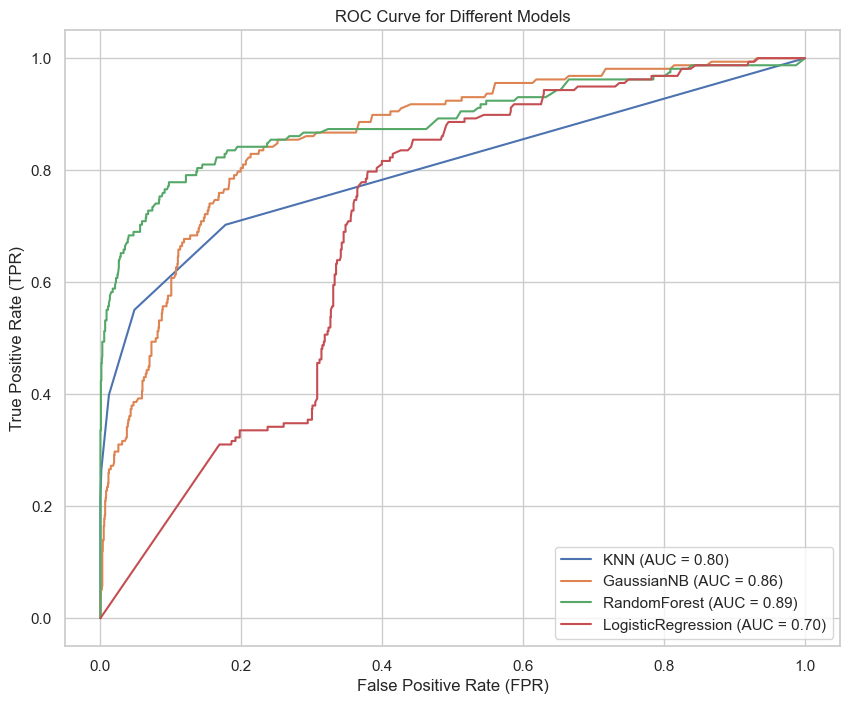

In [868]:
from sklearn.metrics import roc_auc_score, roc_curve


knn_proba = knn.predict_proba(X_test)[:, 1]
gnb_proba = gnb.predict_proba(X_test)[:, 1]
lrn_proba = lr.predict_proba(X_test)[:, 1]
rfc_proba = rfc.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_proba)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_proba)
fpr_lrn, tpr_lrn, _ = roc_curve(y_test, lrn_proba)

auc_knn = roc_auc_score(y_test, knn_proba)
auc_gnb = roc_auc_score(y_test, gnb_proba)
auc_rfc = roc_auc_score(y_test, rfc_proba)
auc_lrn = roc_auc_score(y_test, lrn_proba)


plt.figure(figsize=(10, 8))

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {auc_gnb:.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'RandomForest (AUC = {auc_rfc:.2f})')
plt.plot(fpr_lrn, tpr_lrn, label=f'LogisticRegression (AUC = {auc_lrn:.2f})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()